<a href="https://colab.research.google.com/github/AKanshPatel/Probability_Sampling_Techniques/blob/main/Sampling_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing the Data

In [2]:
df = pd.read_csv("/content/StudentsPerformance.xls", usecols = ["gender", "race/ethnicity", "math score", "reading score", "writing score"])
df.head()

,gender,race/ethnicity,math score,reading score,writing score
0,female,group B,72,72,74
1,female,group C,69,90,88
2,female,group B,90,95,93
3,male,group A,47,57,44
4,male,group C,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [5]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


### Info:
Since the population data is small, Lets create a dummy data rows and add to the population data.
Steps:
1. For **Numerical Columns**: We will use the **Normal distibution** to generate random data points
2. For **Categoriacal column**: we will use the **probability** to generate data points.


--- This will generate the data that will be similar to the original data

In [6]:
# For reproducibility
np.random.seed(42)

# Number of students
n = 1000

# -------------------------------
# 1. Generate exam scores
# -------------------------------
math_scores = np.clip(np.random.normal(loc=66.089, scale=15.163, size=n), 0, 100)
reading_scores = np.clip(np.random.normal(loc=69.169, scale=14.600, size=n), 0, 100)
writing_scores = np.clip(np.random.normal(loc=68.054, scale=15.196, size=n), 0, 100)

# -------------------------------
# 2. Generate gender (matching distribution)
# -------------------------------
genders = ["female", "male"]
gender_probs = [518/1000, 482/1000]  # probabilities
gender = np.random.choice(genders, size=n, p=gender_probs)

# -------------------------------
# 3. Generate race/ethnicity (matching distribution)
# -------------------------------
groups = ["group C", "group D", "group B", "group E", "group A"]
group_probs = [319/1000, 262/1000, 190/1000, 140/1000, 89/1000]
race = np.random.choice(groups, size=n, p=group_probs)

# -------------------------------
# 4. Build final DataFrame
# -------------------------------
df_dummy = pd.DataFrame({
    "gender": gender,
    "race/ethnicity": race,
    "math score": math_scores.round().astype(int),
    "reading score": reading_scores.round().astype(int),
    "writing score": writing_scores.round().astype(int),
})

df_combined = pd.concat([df, df_dummy], ignore_index=True)
df_combined.head()

,gender,race/ethnicity,math score,reading score,writing score
0,female,group B,72,72,74
1,female,group C,69,90,88
2,female,group B,90,95,93
3,male,group A,47,57,44
4,male,group C,76,78,75


In [7]:
student_scores = df_combined

In [8]:
student_scores.describe()

,math score,reading score,writing score
count,2000.00000,2000.00000,2000.000000
mean,66.19800,69.63750,68.031500
std,14.90627,14.47684,14.913843
min,0.00000,17.00000,10.000000
25%,56.00000,60.00000,58.000000
50%,66.00000,70.00000,68.000000
75%,76.00000,80.00000,78.000000
max,100.00000,100.00000,100.000000


### Lets use the sample size as 400 which is 20% of the population

In [9]:
sample_size = 400

# Probability Sampling:
1. Simple Sampling
2. Systematic Sampling
3. Stratified Sampling
4. Cluster Sampling

## Simple Sampling

In [10]:
# Simple Sampling: Equal probability
simple_sample = df.sample(n=sample_size, random_state=42)
simple_sample

,gender,race/ethnicity,math score,reading score,writing score
521,female,group C,91,86,84
737,female,group B,53,66,73
740,male,group D,80,73,72
660,male,group C,74,77,73
411,male,group E,84,83,78
...,...,...,...,...,...
56,female,group E,82,85,86
405,female,group C,63,73,68
442,female,group A,59,73,69
757,male,group E,70,68,72


In [11]:
simple_sample.describe()

,math score,reading score,writing score
count,400.000000,400.000000,400.000000
mean,65.302500,68.517500,67.415000
std,15.521381,15.332724,15.909921
min,0.000000,17.000000,10.000000
25%,55.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


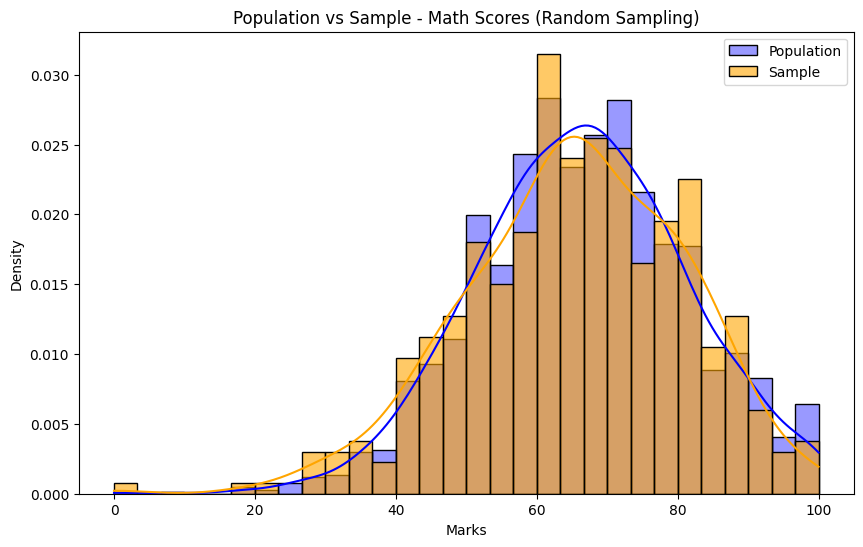

In [12]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['math score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(simple_sample['math score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Math Scores (Random Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

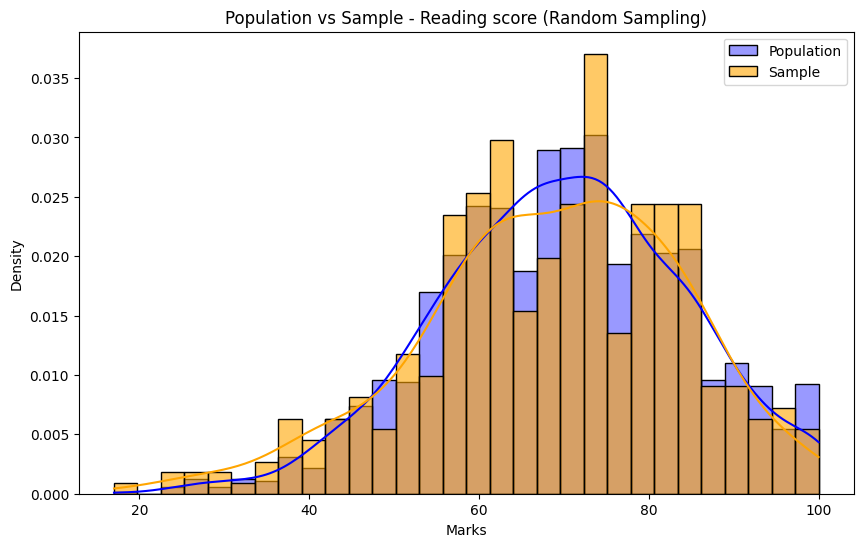

In [13]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['reading score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(simple_sample['reading score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Reading score (Random Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()


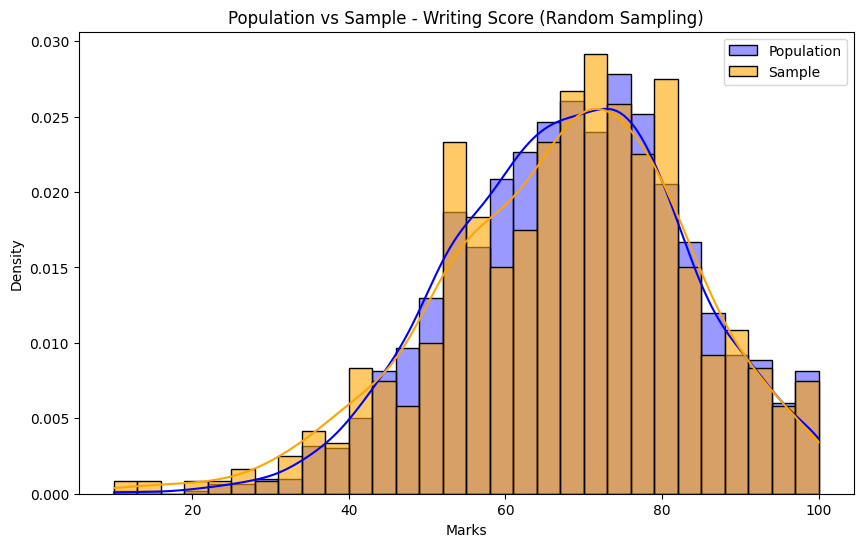

In [14]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['writing score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(simple_sample['writing score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Writing Score (Random Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()


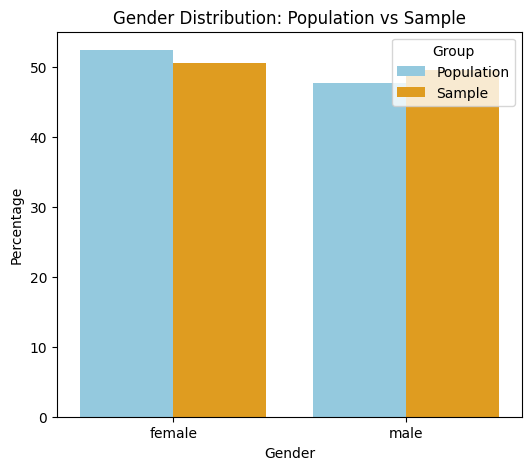

In [16]:
# Population gender counts
pop_gender = student_scores['gender'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = simple_sample['gender'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Gender Distribution: Population vs Sample")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

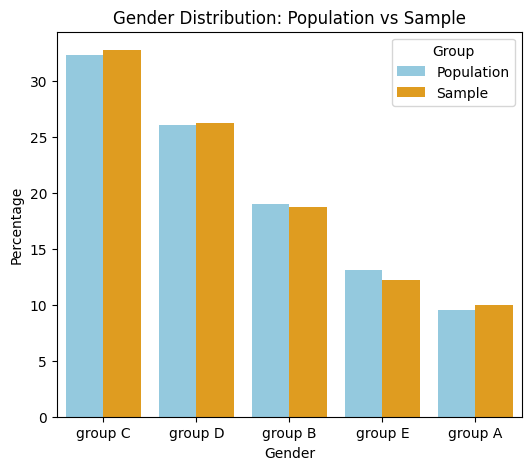

In [17]:
# Population gender counts
pop_gender = student_scores['race/ethnicity'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = simple_sample['race/ethnicity'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Gender Distribution: Population vs Sample")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

## Systematic Sampling
1. What can be the staring point?
2. What can be the size of steps
3. Do we need to shuffle the Data for randomness

In [19]:
student_scores.head()

,gender,race/ethnicity,math score,reading score,writing score
0,female,group B,72,72,74
1,female,group C,69,90,88
2,female,group B,90,95,93
3,male,group A,47,57,44
4,male,group C,76,78,75


In [20]:
student_scores.tail()

,gender,race/ethnicity,math score,reading score,writing score
1995,male,group A,62,85,69
1996,female,group A,93,69,72
1997,male,group C,76,56,49
1998,female,group C,57,67,73
1999,female,group C,75,58,66


In [21]:
k = 5
systematic_sample = student_scores.iloc[0::k]

In [22]:
systematic_sample.shape

(400, 5)

In [23]:
systematic_sample.describe()

,math score,reading score,writing score
count,400.000000,400.000000,400.000000
mean,66.432500,69.432500,69.275000
std,14.360571,14.084615,14.826123
min,8.000000,24.000000,23.000000
25%,58.000000,61.000000,59.000000
50%,67.000000,70.000000,70.500000
75%,76.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


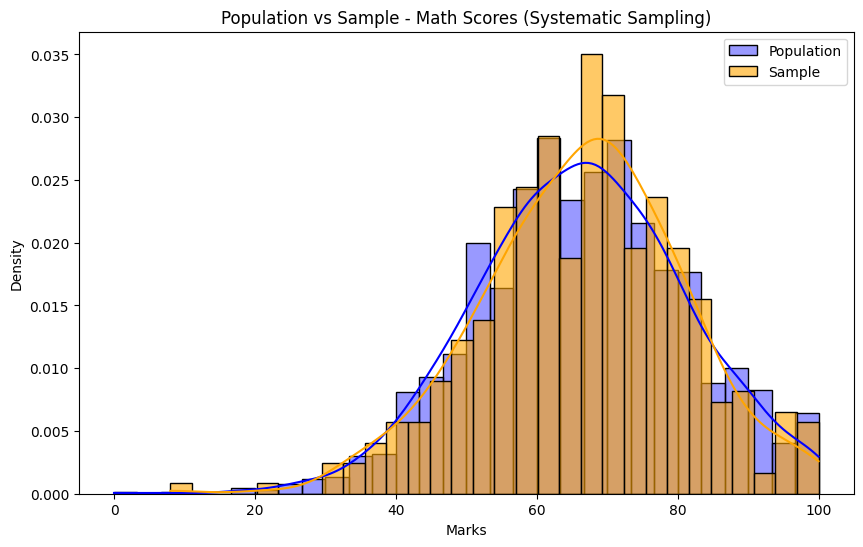

In [24]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['math score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(systematic_sample['math score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Math Scores (Systematic Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

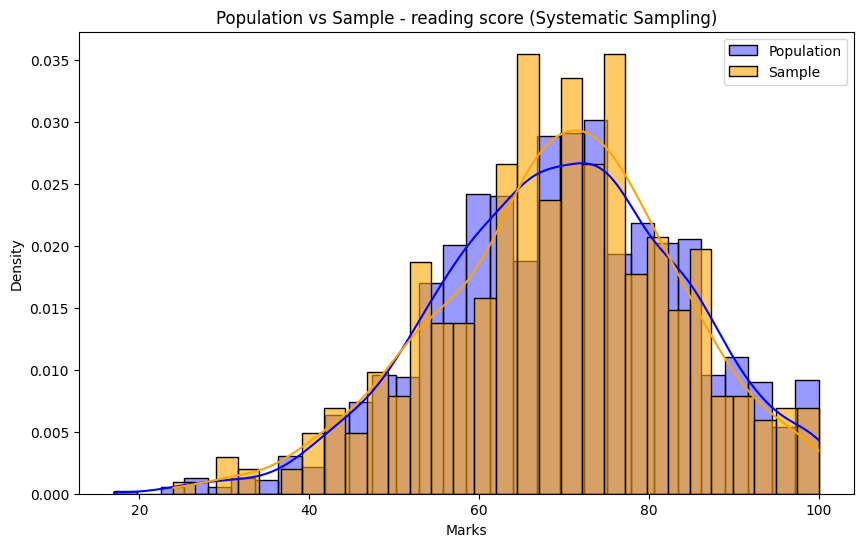

In [25]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['reading score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(systematic_sample['reading score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - reading score (Systematic Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

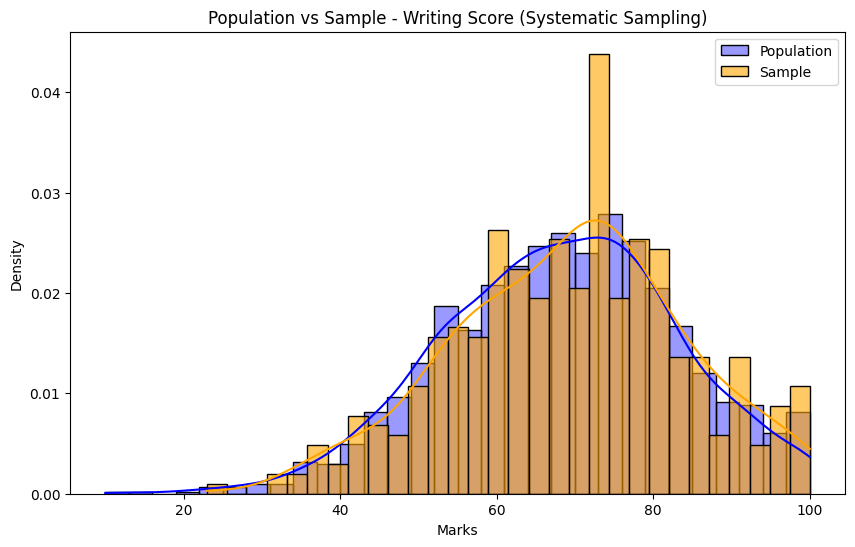

In [26]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['writing score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(systematic_sample['writing score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Writing Score (Systematic Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()


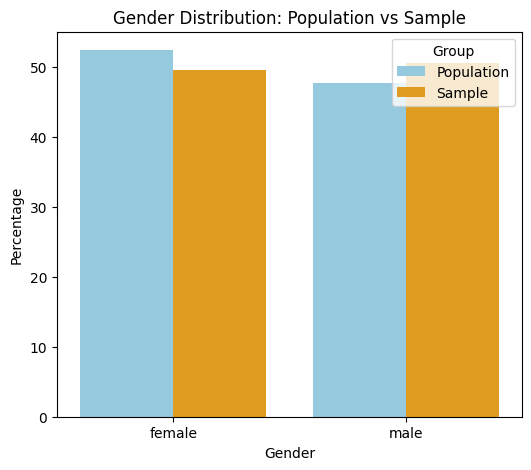

In [27]:
# Population gender counts
pop_gender = student_scores['gender'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = systematic_sample['gender'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Gender Distribution: Population vs Sample")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

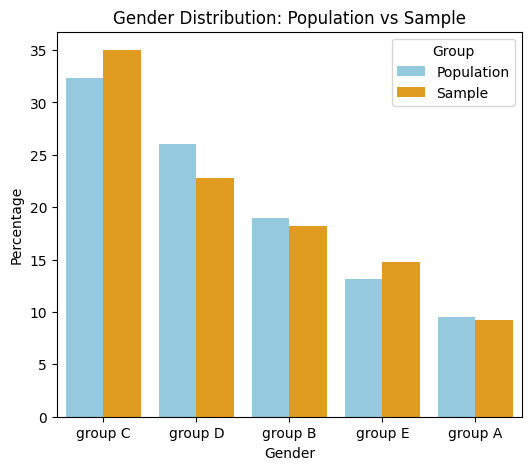

In [28]:
# Population gender counts
pop_gender = student_scores['race/ethnicity'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = systematic_sample['race/ethnicity'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Gender Distribution: Population vs Sample")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

## Stratified Sampling:
1. What will be the criterian for creating strata


In [29]:
# Seperate the Dataset based on Gender
# Randomly Sample
df_male = student_scores[student_scores['gender'] == "male"]
df_female = student_scores[student_scores['gender'] == "female"]

In [30]:
df_male.head()

,gender,race/ethnicity,math score,reading score,writing score
3,male,group A,47,57,44
4,male,group C,76,78,75
7,male,group B,40,43,39
8,male,group D,64,64,67
10,male,group C,58,54,52


In [31]:
df_female.head()

,gender,race/ethnicity,math score,reading score,writing score
0,female,group B,72,72,74
1,female,group C,69,90,88
2,female,group B,90,95,93
5,female,group B,71,83,78
6,female,group B,88,95,92


In [32]:
df_male.shape

(953, 5)

In [33]:
df_female.shape

(1047, 5)

In [34]:
random_sample = pd.concat([df_male.sample(n=200, random_state=42), df_female.sample(n=200, random_state=42)], ignore_index=True)

In [35]:
random_sample.head()

,gender,race/ethnicity,math score,reading score,writing score
0,male,group E,76,67,67
1,male,group B,61,42,41
2,male,group B,65,50,79
3,male,group D,70,57,74
4,male,group B,71,77,72


In [36]:
random_sample.tail()

,gender,race/ethnicity,math score,reading score,writing score
395,female,group C,54,64,65
396,female,group E,64,62,68
397,female,group B,94,87,92
398,female,group D,43,60,58
399,female,group E,94,99,100


In [37]:
random_sample.describe()

,math score,reading score,writing score
count,400.000000,400.000000,400.000000
mean,66.072500,69.797500,68.287500
std,15.189108,14.911317,15.880817
min,0.000000,17.000000,10.000000
25%,57.000000,60.000000,58.000000
50%,67.000000,71.000000,68.000000
75%,76.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


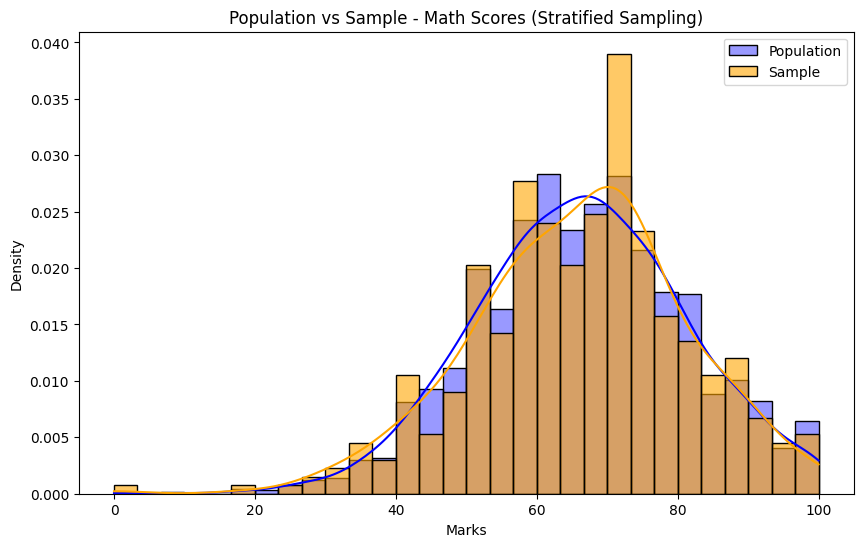

In [38]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['math score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(random_sample['math score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Math Scores (Stratified Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

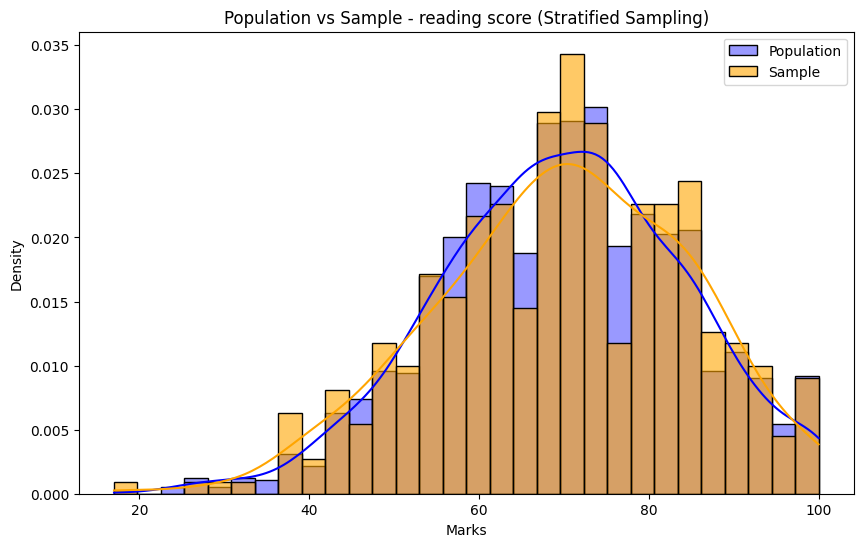

In [39]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['reading score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(random_sample['reading score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - reading score (Stratified Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()


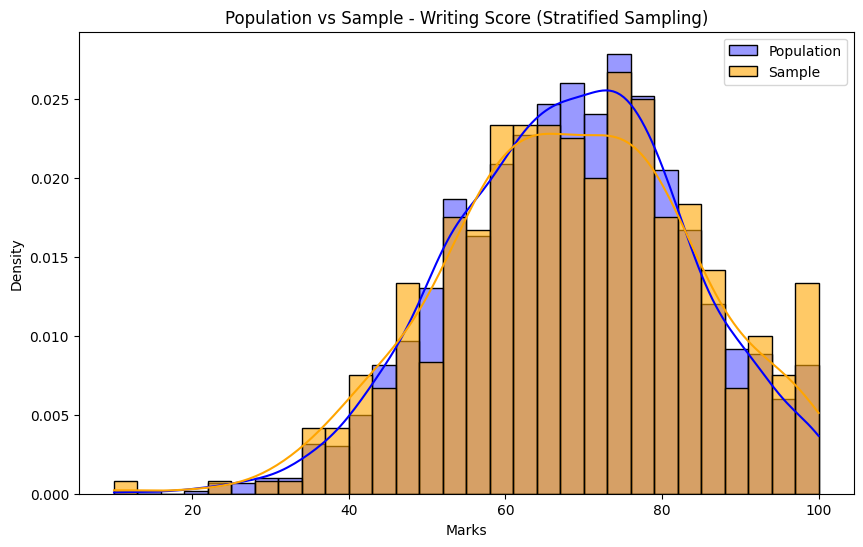

In [40]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['writing score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(random_sample['writing score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Writing Score (Stratified Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()


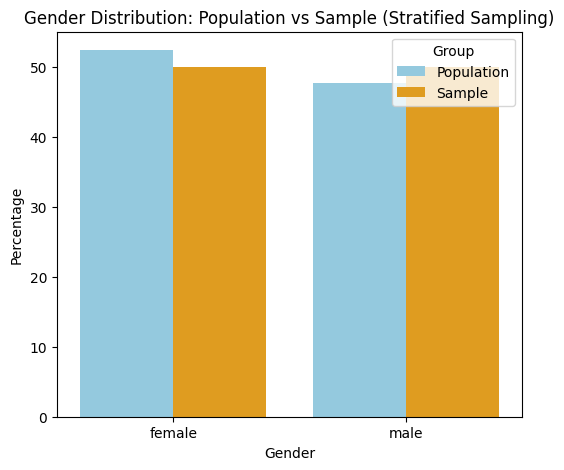

In [41]:
# Population gender counts
pop_gender = student_scores['gender'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = random_sample['gender'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Gender Distribution: Population vs Sample (Stratified Sampling)")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

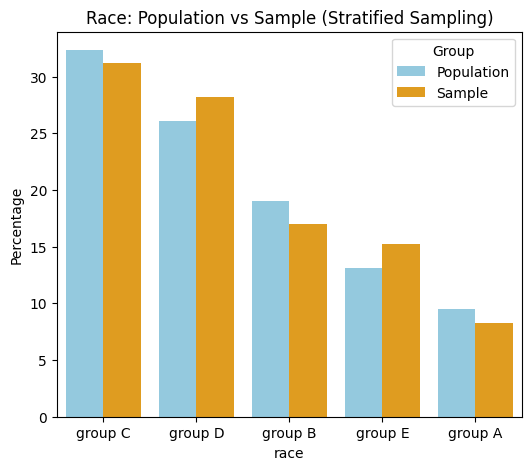

In [42]:
# Population gender counts
pop_gender = student_scores['race/ethnicity'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = random_sample['race/ethnicity'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Race: Population vs Sample (Stratified Sampling)")
plt.xlabel("race")
plt.ylabel("Percentage")
plt.show()

In [43]:
student_scores['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,647
group D,521
group B,380
group E,262
group A,190


In [44]:
sample_size = 75

df_grpA = student_scores[student_scores['race/ethnicity'] == "group A"].sample(n=sample_size, random_state=42, replace=True)
df_grpB = student_scores[student_scores['race/ethnicity'] == "group B"].sample(n=sample_size, random_state=42, replace=True)
df_grpC = student_scores[student_scores['race/ethnicity'] == "group C"].sample(n=sample_size, random_state=42, replace=True)
df_grpD = student_scores[student_scores['race/ethnicity'] == "group D"].sample(n=sample_size, random_state=42, replace=True)
df_grpE = student_scores[student_scores['race/ethnicity'] == "group E"].sample(n=sample_size, random_state=42, replace=True)

random_sample_race = pd.concat([df_grpA, df_grpB, df_grpC, df_grpD, df_grpE])


In [45]:
random_sample_race['race/ethnicity'].value_counts()

,count
race/ethnicity,
group A,75
group B,75
group C,75
group D,75
group E,75


In [46]:
random_sample_race.describe()

,math score,reading score,writing score
count,375.000000,375.000000,375.000000
mean,66.181333,69.645333,67.789333
std,15.589115,14.854538,15.583513
min,8.000000,24.000000,22.000000
25%,55.000000,60.000000,57.500000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.500000,79.000000
max,100.000000,100.000000,100.000000


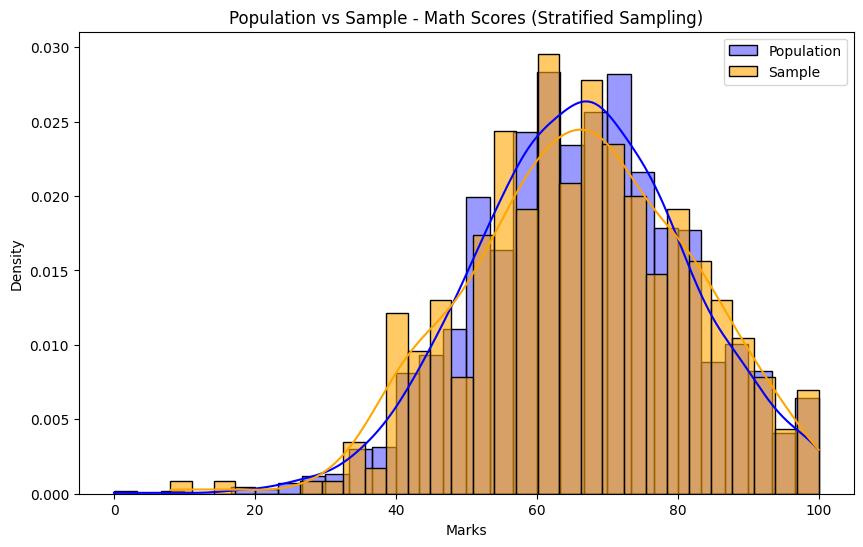

In [47]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['math score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(random_sample_race['math score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Math Scores (Stratified Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

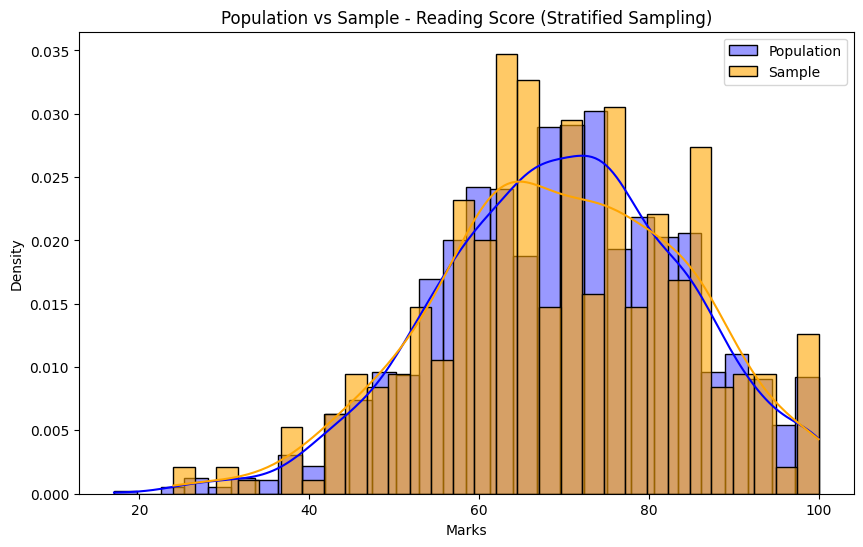

In [48]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['reading score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(random_sample_race['reading score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Reading Score (Stratified Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

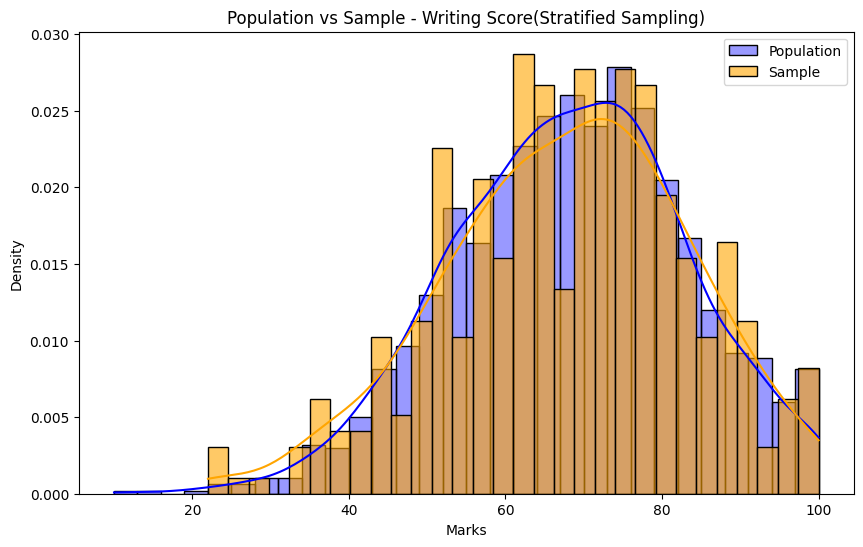

In [49]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['writing score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(random_sample_race['writing score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Writing Score(Stratified Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

<Figure size 1000x400 with 0 Axes>

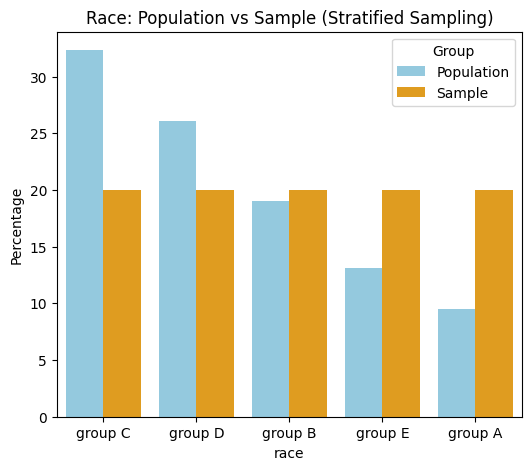

In [51]:
plt.figure(figsize=(10,4))
# Population gender counts
pop_gender = student_scores['race/ethnicity'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = random_sample_race['race/ethnicity'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Race: Population vs Sample (Stratified Sampling)")
plt.xlabel("race")
plt.ylabel("Percentage")
plt.show()

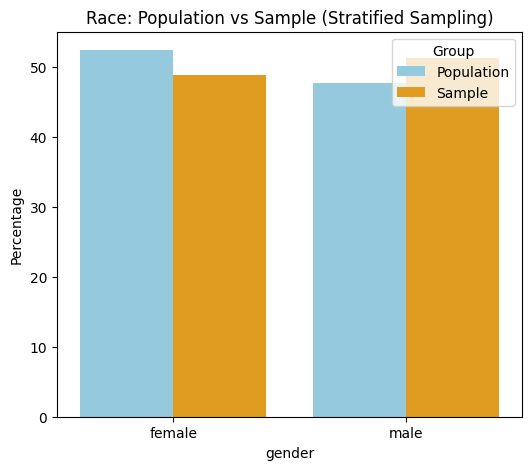

In [52]:
# Population gender counts
pop_gender = student_scores['gender'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = random_sample_race['gender'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Race: Population vs Sample (Stratified Sampling)")
plt.xlabel("gender")
plt.ylabel("Percentage")
plt.show()

## Cluster Sampling
1. On what columns the clusters will be created?

In [53]:
df_grpA = student_scores[student_scores['race/ethnicity'] == "group A"]
df_grpB = student_scores[student_scores['race/ethnicity'] == "group B"]

In [54]:
cluster_sample = pd.concat([df_grpA, df_grpB])

In [55]:
cluster_sample.head()

,gender,race/ethnicity,math score,reading score,writing score
3,male,group A,47,57,44
13,male,group A,78,72,70
14,female,group A,50,53,58
25,male,group A,73,74,72
46,female,group A,55,65,62


In [56]:
cluster_sample.tail()

,gender,race/ethnicity,math score,reading score,writing score
1971,male,group B,56,26,67
1974,female,group B,59,69,82
1978,female,group B,42,58,76
1980,male,group B,78,55,72
1989,male,group B,66,75,100


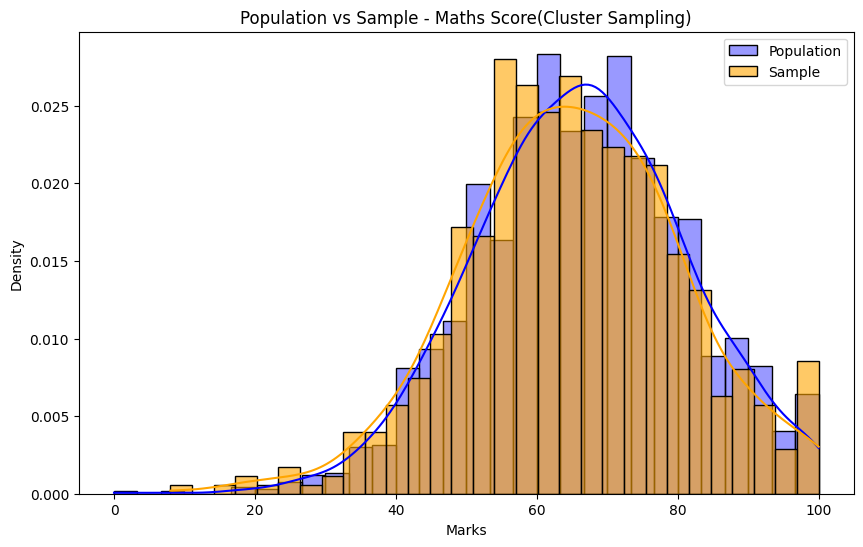

In [57]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['math score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(cluster_sample['math score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Maths Score(Cluster Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

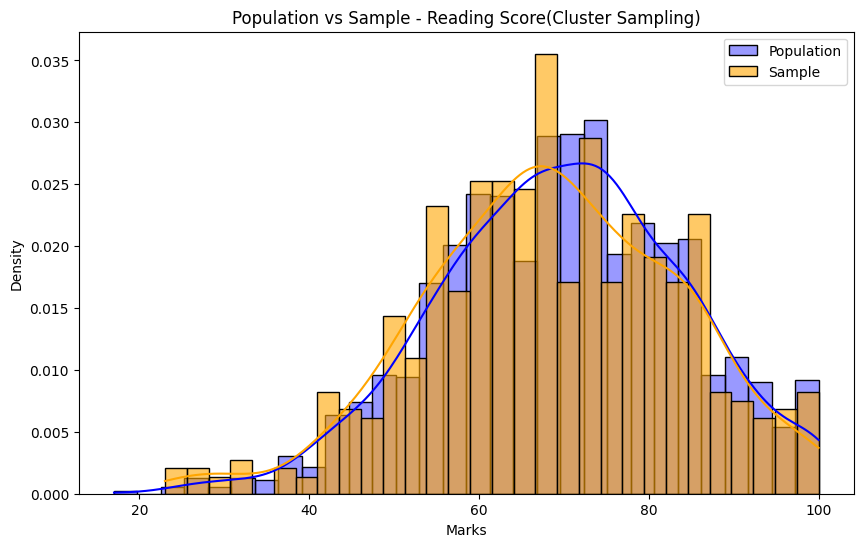

In [58]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['reading score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(cluster_sample['reading score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Reading Score(Cluster Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

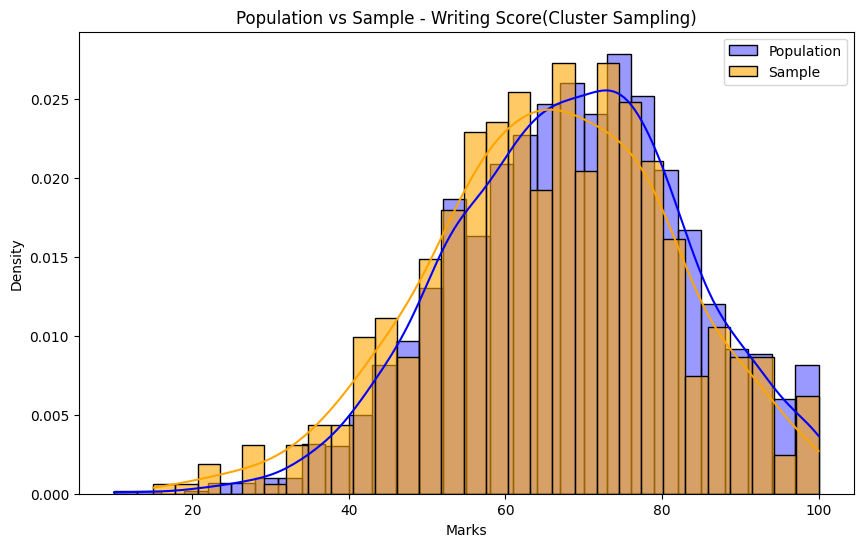

In [59]:
plt.figure(figsize=(10,6))

# Population
sns.histplot(student_scores['writing score'],
             bins=30,
             kde=True,
             color="blue",
             edgecolor="black",
             stat="density",
             label="Population",
             alpha=0.4)

# Sample
sns.histplot(cluster_sample['writing score'],
             bins=30,
             kde=True,
             color="orange",
             edgecolor="black",
             stat="density",
             label="Sample",
             alpha=0.6)

# Labels
plt.title("Population vs Sample - Writing Score(Cluster Sampling)")
plt.xlabel("Marks")
plt.ylabel("Density")
plt.legend()

plt.show()

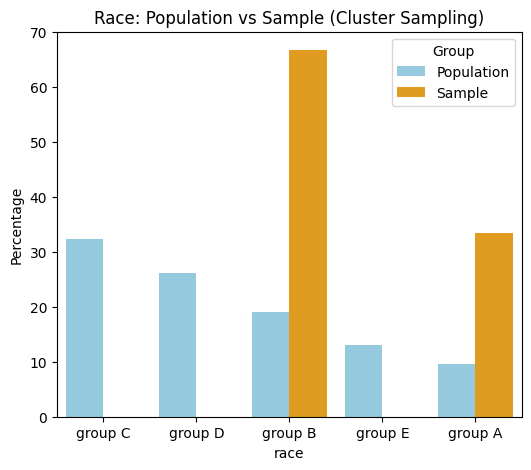

In [60]:
# Population gender counts
pop_gender = student_scores['race/ethnicity'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = cluster_sample['race/ethnicity'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("Race: Population vs Sample (Cluster Sampling)")
plt.xlabel("race")
plt.ylabel("Percentage")
plt.show()

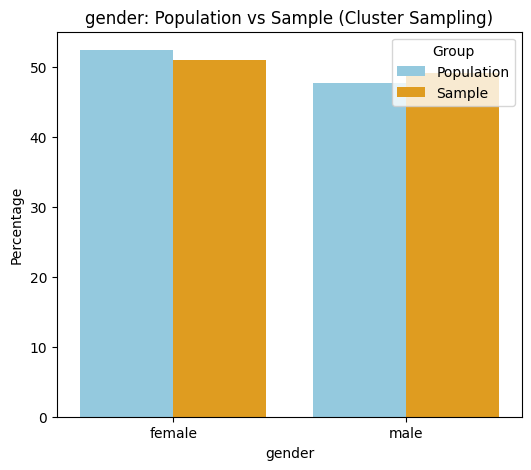

In [61]:
# Population gender counts
pop_gender = student_scores['gender'].value_counts(normalize=True) * 100
# Sample gender counts
sample_gender = cluster_sample['gender'].value_counts(normalize=True) * 100

# Combine into one dataframe
gender_df = pd.DataFrame({
    "Category": pop_gender.index,       # gender categories
    "Population": pop_gender.values,
    "Sample": sample_gender.reindex(pop_gender.index).values  # align indexes
})

# Melt into long format for seaborn
gender_df = gender_df.melt(id_vars="Category", var_name="Group", value_name="Percentage")

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x="Category", y="Percentage", hue="Group", data=gender_df, palette=["skyblue","orange"])
plt.title("gender: Population vs Sample (Cluster Sampling)")
plt.xlabel("gender")
plt.ylabel("Percentage")
plt.show()